<a href="https://colab.research.google.com/github/himanshuarora1703/Tutorial-notebooks/blob/main/Feature%20Scaling/Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
display(df)
display(df.shape)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


(400, 5)

In [4]:
from sklearn import set_config
set_config(print_changed_only=True)

In [5]:
# check for misssing values

df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
# remove the non-essential column

df.drop(df.columns[0:2],axis=1,inplace=True)

In [9]:
# make x and y

X = df.drop(columns=['Purchased'])
y = df['Purchased']

In [10]:
# Do train test_split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


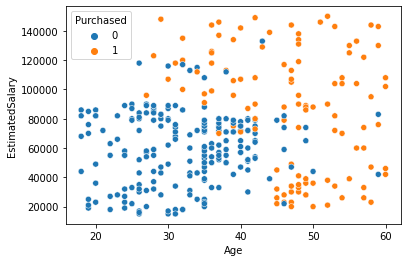

In [13]:
# plot the points on the graph

sns.scatterplot(X_train.iloc[:,0],X_train.iloc[:,1],hue=y_train)

In [ ]:
# Do the scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

X_train_scaled

In [21]:
display(X_train.describe().loc[['mean','std']])

print('The mean of scaled values is',np.round(np.mean(X_train_scaled,axis=0)))
print('the SD of the scaled values is',np.std(X_train_scaled,axis=0))

,Age,EstimatedSalary
mean,37.493750,69206.250000
std,10.383853,33334.553204


The mean of scaled values is [0. 0.]
the SD of the scaled values is [1. 1.]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'After Scaling')

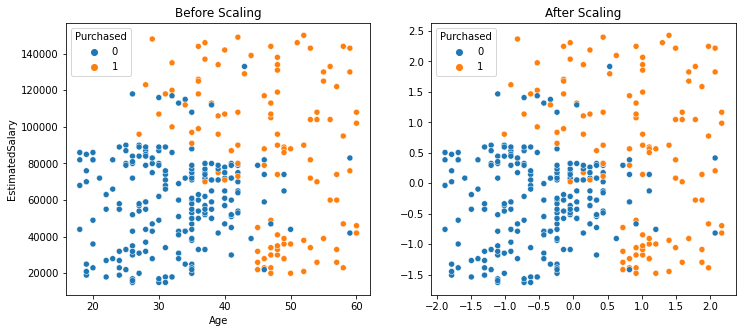

In [25]:
# plot the points on the graph
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(X_train.iloc[:,0],X_train.iloc[:,1],hue=y_train)
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.scatterplot(X_train_scaled[:,0],X_train_scaled[:,1],hue=y_train)
plt.title('After Scaling')

- scaling has no effect on the distribution of the data




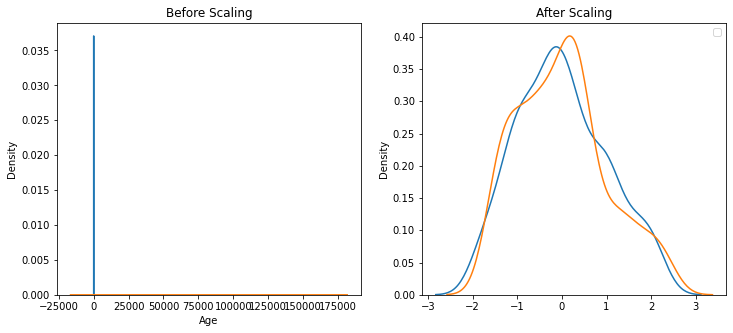

In [29]:
# view the distribution of the graphs

fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train.iloc[:,0],ax=ax1)
sns.kdeplot(X_train.iloc[:,1],ax=ax1)


# After scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled[:,0],ax=ax2)
sns.kdeplot(X_train_scaled[:,1],ax=ax2)

The kde plot before scaling had all the values of the age column distributed in a narrow range because it was in a different scale compared to the salary column.

Text(0.5, 1.0, 'After Scaling')

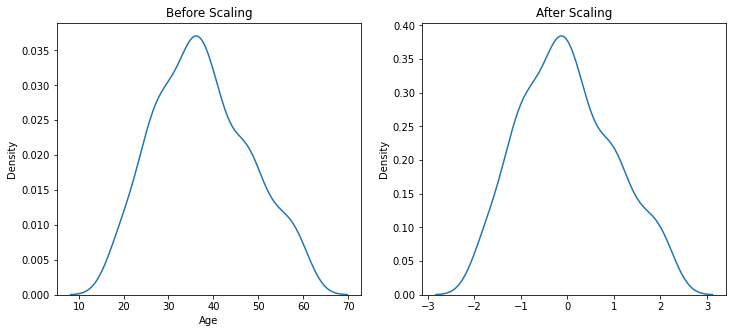

In [30]:
# Age Column distribution

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(X_train.iloc[:,0])
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.kdeplot(X_train_scaled[:,0])
plt.title('After Scaling')

Text(0.5, 1.0, 'After Scaling')

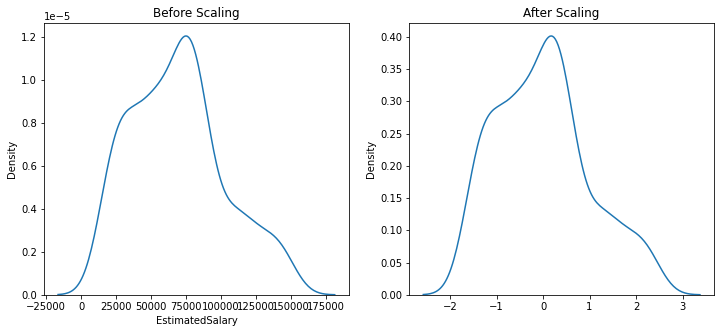

In [32]:
# salary column distribution

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(X_train.iloc[:,1])
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.kdeplot(X_train_scaled[:,1])
plt.title('After Scaling')

No effect on distribution of the data

## Check the effect of scaling

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [34]:
log = LogisticRegression()
log_scaled = LogisticRegression()

knn = KNeighborsClassifier()
knn_scaled = KNeighborsClassifier() 

In [35]:
log.fit(X_train,y_train)
log_scaled.fit(X_train_scaled,y_train)
knn.fit(X_train,y_train)
knn_scaled.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [46]:
# check for the accuracy score of logistic regression

print('score before scaling is',accuracy_score(y_test,y_pred=log.predict(X_test)))
print('score after scaling is',accuracy_score(y_test,y_pred=log_scaled.predict(X_test_scaled)))

score before scaling is 0.6
score after scaling is 0.8


In [47]:
# check the accuracy scores for knn

print('score before scaling is',accuracy_score(y_test,y_pred=knn.predict(X_test)))
print('score before scaling is',accuracy_score(y_test,y_pred=knn_scaled.predict(X_test_scaled)))

score before scaling is 0.7875
score before scaling is 0.9125


- As we can see, scaling does improve the performance of models that are distance based.

In [50]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

print('score before scaling is',accuracy_score(y_test,y_pred=dt.predict(X_test)))
print('score after scaling is',accuracy_score(y_test,y_pred=dt_scaled.predict(X_test_scaled)))

score before scaling is 0.9
score after scaling is 0.8875


- We can see that the scaling has no benefit whatsoever on the tree based models.

## Effect of outliers

In [51]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

In [52]:
# make x and y

X = df.drop(columns=['Purchased'])
y = df['Purchased']

In [53]:
# Do train test_split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


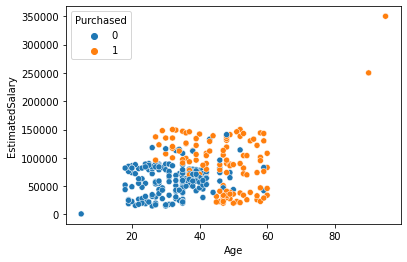

In [54]:
# plot the points on the graph

sns.scatterplot(X_train.iloc[:,0],X_train.iloc[:,1],hue=y_train)

In [55]:
# Do the scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'After Scaling')

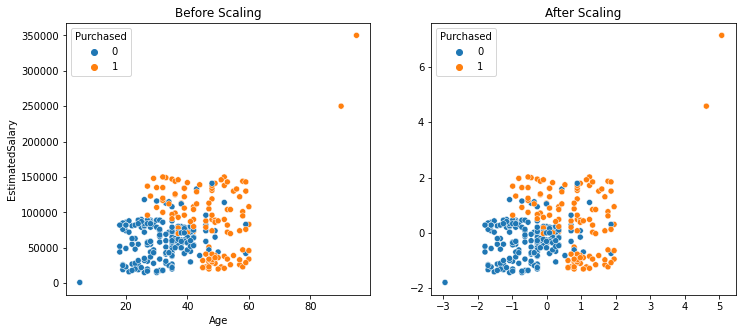

In [56]:
# plot the comparison graphs

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(X_train.iloc[:,0],X_train.iloc[:,1],hue=y_train)
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.scatterplot(X_train_scaled[:,0],X_train_scaled[:,1],hue=y_train)
plt.title('After Scaling')

scaling has no effect on the outliers and the distribution of the outliers stays as it is